<a href="https://colab.research.google.com/github/arianajschindler/oatmealmonsters_tiktok_2022/blob/main/oatmealmonsters_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oatmealmonsters TikTok Video Analysis

In [21]:
# mounting the google drive
from google.colab import drive
drive.mount('/gdrive')
import pandas as pd
# importing data
oatmeal = pd.read_csv('/gdrive/MyDrive/oatmealmonsters/video_specific_data.csv')
oatmeal.head()

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


,date,hour,category,duration,average_watch_time_seconds,percent_watched_full,plays,likes,comments,shares,voiceover,in_video_text,captions,viral
0,05/12/2021,2100,cooking prep,55.70,26.6,16.14,63300.0,3278,28,237,yes,no,yes,0
1,05/13/2021,800,how to,59.19,24.7,16.52,80900.0,3582,59,235,yes,no,no,0
2,05/13/2021,1200,dinner prep,56.38,25.2,23.93,63300.0,3466,28,311,yes,yes,yes,0
3,05/14/2021,1200,how to,35.48,22.7,29.95,59500.0,3622,54,227,yes,no,yes,0
4,05/14/2021,1100,dinner prep,59.19,29.6,35.36,77700.0,5009,65,403,yes,no,yes,0


## EDA

### quick look at the data

In [22]:
# checking quick statistics
oatmeal.describe()

,hour,duration,average_watch_time_seconds,percent_watched_full,plays,likes,comments,shares,viral
count,105.000000,105.000000,105.000000,105.000000,1.050000e+02,105.000000,105.000000,105.000000,105.000000
mean,1051.428571,34.680762,17.160000,26.668095,2.566319e+05,20948.542857,142.200000,1585.219048,0.257143
std,221.929600,17.101039,7.523011,12.734048,7.246962e+05,83111.256888,439.833784,8267.325720,0.439155
min,700.000000,8.000000,3.700000,2.470000,1.366000e+02,155.000000,1.000000,1.000000,0.000000
25%,900.000000,20.000000,10.700000,17.160000,2.920000e+04,1180.000000,16.000000,16.000000,0.000000
50%,1000.000000,33.000000,16.500000,25.850000,6.140000e+04,2418.000000,30.000000,70.000000,0.000000
75%,1100.000000,51.850000,23.500000,35.360000,1.035000e+05,5251.000000,68.000000,253.000000,1.000000
max,2100.000000,60.110000,36.700000,63.510000,5.700000e+06,748800.000000,3910.000000,77700.000000,1.000000


In [23]:
# 105 rows, 9 columns
oatmeal.shape

(105, 14)

In [24]:
# checking the columns of the dataset
oatmeal.columns

Index(['date', 'hour', 'category', 'duration', 'average_watch_time_seconds',
       'percent_watched_full', 'plays', 'likes', 'comments', 'shares',
       'voiceover', 'in_video_text', 'captions', 'viral'],
      dtype='object')

In [25]:
# checking the datatypes
oatmeal.dtypes

date                           object
hour                            int64
category                       object
duration                      float64
average_watch_time_seconds    float64
percent_watched_full          float64
plays                         float64
likes                           int64
comments                        int64
shares                          int64
voiceover                      object
in_video_text                  object
captions                       object
viral                           int64
dtype: object

In [26]:
# checking for unique values
oatmeal.nunique()

date                           96
hour                           11
category                       15
duration                       89
average_watch_time_seconds     83
percent_watched_full          105
plays                          97
likes                         105
comments                       68
shares                         85
voiceover                       2
in_video_text                   2
captions                        2
viral                           2
dtype: int64

In [27]:
# checking out how many different categories of videos are made
oatmeal['category'].unique()

array(['cooking prep', 'how to', 'dinner prep', 'inquiry', 'cooking',
       'trend', 'shopping', 'breakfast prep', 'response', 'organization',
       'dessert prep', 'lunch prep', 'filler', 'tips', 'baby prep'],
      dtype=object)

### cleaning the data

In [28]:
# checking the data for null values
oatmeal.isnull().sum()

date                          0
hour                          0
category                      0
duration                      0
average_watch_time_seconds    0
percent_watched_full          0
plays                         0
likes                         0
comments                      0
shares                        0
voiceover                     0
in_video_text                 0
captions                      0
viral                         0
dtype: int64

In [29]:
# dropping columns with variables concerning production
oatmeal = oatmeal.drop(columns=['voiceover'])
oatmeal = oatmeal.drop(columns=['in_video_text'])
oatmeal = oatmeal.drop(columns=['captions'])

In [30]:
# changing the date to datetime data type and extracting the day to add as a new column
oatmeal['date'] = pd.to_datetime(oatmeal['date'])
oatmeal['day_of_week'] = oatmeal['date'].dt.day_name()

### Relationship Analysis

The first thing I am interested in is how my videos perform by the different categories I post. I am most known for my dinner meal preps so I am curious to see if that is where most of my engagement comes from.

In [31]:
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import numpy as np
import seaborn as sns

TikTok analytics offers the average watch time for each video, but I wanted to know the ratio of averate watch time to the actual duration of the posted video to create a uniform way each video is assessed for engagement considering watch time. I added this as a new variable.

In [32]:
oatmeal['ratio_watched'] = oatmeal['average_watch_time_seconds']/oatmeal['duration']

In [33]:
# grouping my dataset by category and then checking out the mean of each continuous category
# i am mostly interested in the average watch time 
oatmeal.groupby(['category']).mean()

,hour,duration,average_watch_time_seconds,percent_watched_full,plays,likes,comments,shares,viral,ratio_watched
category,,,,,,,,,,
baby prep,1000.000000,59.277500,18.275000,16.410000,24125.000000,1238.500000,15.000000,49.000000,0.250000,0.308493
breakfast prep,1055.555556,51.025556,22.955556,24.068889,840566.666667,98508.000000,535.222222,10551.777778,0.222222,0.446370
cooking,1050.000000,40.820000,22.050000,29.215000,45300.000000,1362.000000,22.000000,16.000000,0.500000,0.488827
cooking prep,1110.000000,39.116000,20.970000,20.795000,56240.000000,3055.300000,27.000000,135.300000,0.200000,0.570466
dessert prep,1050.000000,45.677500,15.500000,14.007500,32440.250000,1448.750000,14.500000,84.250000,0.000000,0.359366
dinner prep,1087.500000,49.789375,25.287500,30.418125,449175.000000,34473.062500,182.687500,2717.500000,0.250000,0.513548
filler,1113.333333,20.116667,10.113333,26.147333,110515.133333,8389.400000,144.600000,547.133333,0.133333,0.561306
how to,1041.176471,34.481765,17.711765,27.662941,257964.705882,10387.058824,95.470588,205.588235,0.294118,0.564452
inquiry,1125.000000,22.637500,10.900000,21.002500,105625.000000,1136.250000,142.500000,263.500000,0.250000,0.521626


In [79]:
sns.set_palette("Spectral")

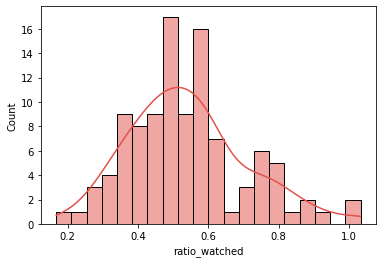

In [80]:
sns.histplot(data=oatmeal, x="ratio_watched", bins=20, kde=True)

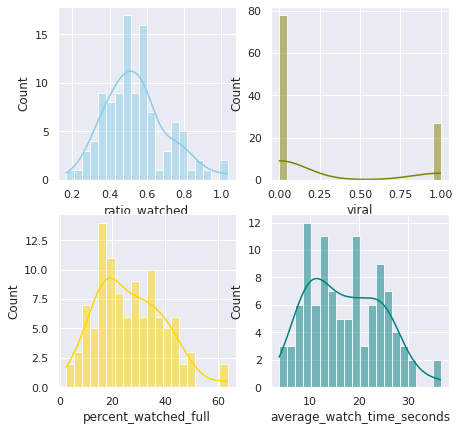

In [98]:
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

fig, axs = plt.subplots(2,2, figsize=(7, 7))

sns.histplot(data=oatmeal, x="ratio_watched", kde=True, color="skyblue", ax=axs[0, 0], bins=20)
sns.histplot(data=oatmeal, x="viral", kde=True, color="olive", ax=axs[0, 1], bins=20)
sns.histplot(data=oatmeal, x="percent_watched_full", kde=True, color="gold", ax=axs[1, 0], bins=20)
sns.histplot(data=oatmeal, x="average_watch_time_seconds", kde=True, color="teal", ax=axs[1, 1], bins=20)


plt.show()

In [34]:
# creating a heatmap of all of the variables
correlation = oatmeal.corr()

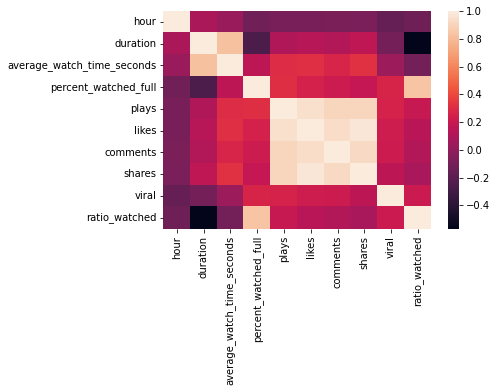

In [74]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=False)

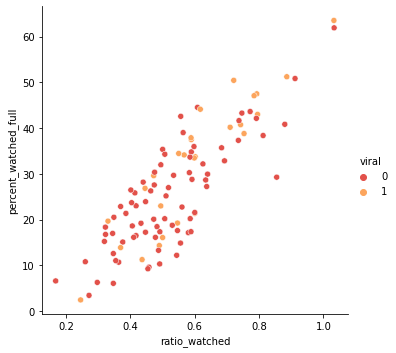

In [81]:
# visualizing 
sns.relplot(x='ratio_watched', y='percent_watched_full', hue='viral', data=oatmeal)

## This is continuing! (last updated 02/26/2022)